# 1. Introduction 

##### This study predicts which bank customers will churn by means of machine learning modelling techniques. It presents a full machine learning work flow, use 11 Machine Learning algorithms, tune their parameters and ensemble the best n (e.g. 3) of them using their accuracy scores for the validation set. 

<font color = 'blue'>
 CONTENTS:  
    
   1. [Introduction](#1)
       * 1.1 [Summary Information about the variables and their types in the data](#1.1)
   2. [Exploratory Data Analysis](#2)
       * 2.1 [Importing Libraries and Loading Data](#2.1)
       * 2.2 [Basic summary statistics about the data](#2.2)            
       * 2.3 [Visualizations](#2.3)
           * 2.3.1 [Correlation matrix as heatmap](#4.1)
           * 2.3.2 [Tenure and Exited](#4.2)
           * 2.3.3 [Gender versus Exited](#4.3)
           * 2.3.4 [Age versus Exited](#4.4)
           * 2.3.5 [Balance versus Survived](#4.5)
           * 2.3.6 [EstimatedSalary versus Exited](#4.6)
           * 2.3.7 [Creeditscore versus Exited](#4.7)
   3. [Data Preprocessing](#3)
       * 3.1 [Splitting the data as train and validation data](#3.1)  
       * 3.2 [Handling Categorical Variables](#3.6)
           * 3.2.1 [Label encoding of gender variable and removing surname](#3.6.1)            
           * 3.2.3 [One hot encoding of Geography (Country)](#3.6.2)   
       * 3.3 [Memory Reduction](#3.3)
   4. [Modeling, Model Evaluation and Model Tuning](#6)
       * 4.1 [Validation Set Test Accuracy for the default models](#6.2) 
       * 4.2 [Cross validation accuracy and std of the default models for all the train data](#6.3)    
       * 4.3 [Model tuning using crossvalidation](#6.4)   
       * 4.4 [Ensembling first n (e.g. 5) models](#6.6) 

 

## 1.1 Summary Information about the variables and their types in the data <a id = '1.1'></a><br>



* Surname          : The surname of the customer
* CreditScore      : The credit score of the customer
* Geography        : The country of the customer(Germany/France/Spain)
* Gender           : The gender of the customer (Female/Male)
* Age              : The age of the customer  
* Tenure           : The customer's number of years in the in the bank 
* Balance          : The customer's account balance
* NumOfProducts    : The number of bank products that the customer uses 
* HasCrCard        : Does the customer has a card? (0=No,1=Yes) 
* IsActiveMember   : Does the customer has an active mebership (0=No,1=Yes) 
* EstimatedSalary  : The estimated salary of the customer
* Exited           : Churned or not? (0=No,1=Yes)

# 2. Exploratory Data Analysis <a id = '2'></a><br> 

### 2.1 Importing Libraries and Loading Data <a id = '2.1'></a><br>

In [1]:
# data analysis libraries:
import numpy as np
import pandas as pd
import re

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") 
    os.environ["PYTHONWARNINGS"] = "ignore" 

# to display all columns:
pd.set_option('display.max_columns', None)

#timer
import time
from contextlib import contextmanager

# Importing modelling libraries
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
pd.options.display.float_format = "{:,.2f}".format

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} done in {:.0f}s".format(title, time.time() - t0))

In [2]:
# Read train and test data with pd.read_csv():
df = pd.read_csv("../input/predicting-churn-for-bank-customers/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2.2 Basic summary statistics about the data <a id = '2.2'></a><br>

##### Descriptive statistics excluding CustomerId and row number which do not carry any meaningful information for Survival.

In [5]:
df.iloc[:,2:len(df)].describe([0.01,0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,99%,max
CreditScore,"10,000.00",650.53,96.65,350.00,432.00,521.00,584.00,652.00,718.00,850.00,850.00
Age,"10,000.00",38.92,10.49,18.00,21.00,27.00,32.00,37.00,44.00,72.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,0.00,1.00,3.00,5.00,7.00,10.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,0.00,0.00,"97,198.54","127,644.24","185,967.99","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,1.00,1.00,2.00,3.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"1,842.83","20,273.58","51,002.11","100,193.91","149,388.25","198,069.73","199,992.48"
Exited,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [6]:
    for var in df:
        if var != 'Exited':
            if len(list(df[var].unique())) <= 11:
                    print(pd.DataFrame({'Mean_Exited': df.groupby(var)['Exited'].mean()}), end = "\n\n\n")

           Mean_Exited
Geography             
France            0.16
Germany           0.32
Spain             0.17


        Mean_Exited
Gender             
Female         0.25
Male           0.16


        Mean_Exited
Tenure             
0              0.23
1              0.22
2              0.19
3              0.21
4              0.21
5              0.21
6              0.20
7              0.17
8              0.19
9              0.22
10             0.21


               Mean_Exited
NumOfProducts             
1                     0.28
2                     0.08
3                     0.83
4                     1.00


           Mean_Exited
HasCrCard             
0                 0.21
1                 0.20


                Mean_Exited
IsActiveMember             
0                      0.27
1                      0.14




## 2.3 Visualizations <a id = '2.3'></a><br> 

In this section we are going to illustrate the relationship between variables by using visualization tools.

### 2.3.1 Correlation matrix <a id = '4.1'></a><br>

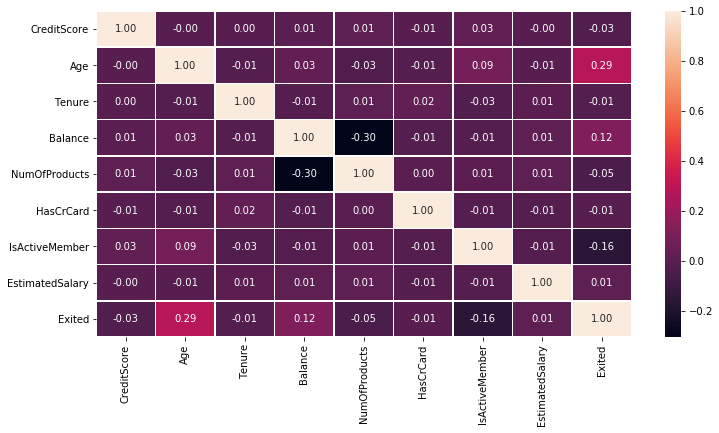

In [7]:
# Let's visualize the correlations between numerical features of the train set.
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(df.loc[:,'Surname':'Exited'].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

### 2.3.2 Tenure and Exited <a id = '4.2'></a><br>       

In the mid tenure level there is less exit.

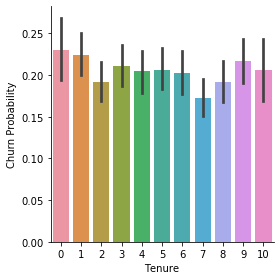

In [8]:
g= sns.factorplot(x = "Tenure", y = "Exited", data = df, kind = "bar", size = 4)
g.set_ylabels("Churn Probability")
plt.show()

 ### 2.3.3 Gender and Exited <a id = '4.3'></a><br>       

Females exits more.

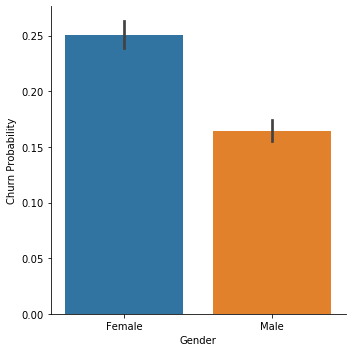

In [9]:
g= sns.factorplot(x = "Gender", y = "Exited", data = df, kind = "bar", size = 5)
g.set_ylabels("Churn Probability")
plt.show()

 ### 2.3.4 Age versus Exited <a id = '4.4'></a><br>   

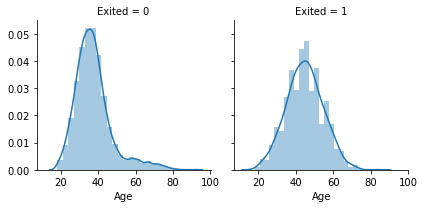

In [10]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

 ### 2.3.5 Balance versus Exited <a id = '4.4'></a><br>   

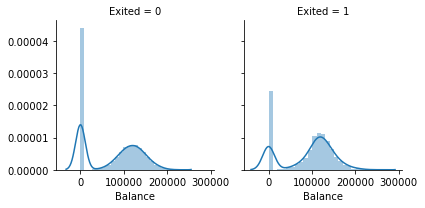

In [11]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)
plt.show()

 ### 2.6 EstimatedSalary versus Exited <a id = '4.4'></a><br>   

Although the they are similar, there seems to be slightly higher salaries for the exited customers.

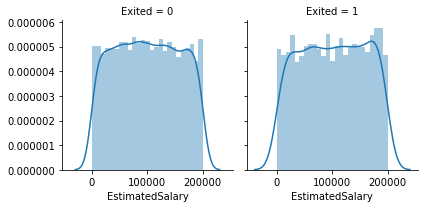

In [12]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "EstimatedSalary", bins = 25)
plt.show()

 ## 2.3.7 Creeditscore versus Exited <a id = '4.7'></a><br>   

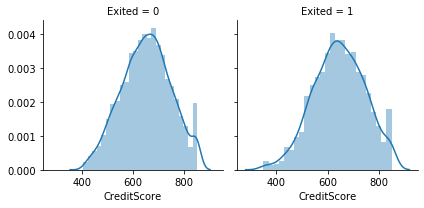

In [13]:
g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "CreditScore", bins = 25)
plt.show()

# 3. Data Preprocessing <a id = '3'></a><br> 

There is no missing value in the data as seen in section 2.2. In addition, from decriptive statistics we can see that  median and mean values are very similar for most of the numerical variables.

## 3.1 Splitting the data as train and validation data <a id = '3.1'></a><br>

In [14]:
##
xs = df.drop(['RowNumber',"Exited"], axis=1)
target = df["Exited"]
x_train, x_val, y_train, y_val = train_test_split(xs, target, test_size = 0.20, random_state = 0)

val_ids = x_val['CustomerId']
train_ids=x_train['CustomerId']

x_train = x_train.drop(['CustomerId'], axis=1)
x_val= x_val.drop(['CustomerId'], axis=1)

df_train=df[df['CustomerId'].isin(train_ids)]
df_val=df[df['CustomerId'].isin(val_ids)]

In [15]:
x_train.shape

(8000, 11)

## 3.3 Handling Categorical Variables <a id = '3.6'></a><br>

### 3.3.1 Label encoding of gender variable and removing surname <a id = '3.6.1'></a><br>

In [16]:
for df in [x_train,x_val]:
    df["Gender"]=df["Gender"].map(lambda x: 0 if x=='Female' else 1)
    df.drop(['Surname'], axis = 1, inplace=True)

### 3.3.2 One hot encoding of Geography (Country) <a id = '3.6.2'></a><br>

In [17]:
x_train,x_val= [ pd.get_dummies(data, columns = ['Geography']) for data in [x_train,x_val]]

In [18]:
x_train.shape

(8000, 12)

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 7389 to 2732
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Gender             8000 non-null   int64  
 2   Age                8000 non-null   int64  
 3   Tenure             8000 non-null   int64  
 4   Balance            8000 non-null   float64
 5   NumOfProducts      8000 non-null   int64  
 6   HasCrCard          8000 non-null   int64  
 7   IsActiveMember     8000 non-null   int64  
 8   EstimatedSalary    8000 non-null   float64
 9   Geography_France   8000 non-null   uint8  
 10  Geography_Germany  8000 non-null   uint8  
 11  Geography_Spain    8000 non-null   uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 648.4 KB


## 3.4 Memory Reduction <a id = '3.4'></a><br>

In [20]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [21]:
for df in [x_train,x_val]:
    reduce_mem_usage(df)    

Memory usage after optimization is: 0.21 MB
Decreased by 67.5%
Memory usage after optimization is: 0.05 MB
Decreased by 67.5%


<a id = '6'></a><br> 
# 4. Modeling, Evaluation and Model Tuning  

## 4.1 Validation Set Accuracy for the default models <a id = '6.2'></a><br>

In [22]:
r=1309
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),BaggingClassifier(random_state=r),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r),
          XGBClassifier(random_state=r), MLPClassifier(random_state=r),
          CatBoostClassifier(random_state=r,verbose = False)]
names = ["LogisticRegression","GaussianNB","KNN","SVC","Bagging",
             "DecisionTree","Random_Forest","GBM","XGBoost","Art.Neural_Network","CatBoost"]

In [23]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val) 
    print(name,':',"%.3f" % accuracy_score(y_pred, y_val))

Default model validation accuracies for the train data:

LogisticRegression : 0.789
GaussianNB : 0.784
KNN : 0.764
SVC : 0.797
Bagging : 0.854
DecisionTree : 0.805
Random_Forest : 0.868
GBM : 0.869
XGBoost : 0.853
Art.Neural_Network : 0.795
CatBoost : 0.862


## 4.2 Cross validation accuracy and std of the default models for all the train data <a id = '6.3'></a><br>

In [24]:
predictors=pd.concat([x_train,x_val])

In [25]:
results = []
print('10 fold Cross validation accuracy and std of the default models for the train data:', end = "\n\n")
for name, model in zip(names, models):
    kfold = KFold(n_splits=10, random_state=1001)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % cv_results.mean() ,"%.3f" %  cv_results.std()))

10 fold Cross validation accuracy and std of the default models for the train data:

LogisticRegression: 0.796 (0.010)
GaussianNB: 0.796 (0.010)
KNN: 0.760 (0.012)
SVC: 0.796 (0.010)
Bagging: 0.779 (0.011)
DecisionTree: 0.660 (0.012)
Random_Forest: 0.794 (0.009)
GBM: 0.795 (0.011)
XGBoost: 0.782 (0.011)
Art.Neural_Network: 0.660 (0.181)
CatBoost: 0.796 (0.010)


## 4.3 Model tuning using crossvalidation <a id = '6.4'></a><br>

In [26]:
# Possible hyper parameters
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

NB_params = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
svc_params= {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1, 5, 10 ,50 ,100],
                 "C": [1,10,50,100,200,300,1000]}
bag_params={"n_estimators":[50,120,300]}
dtree_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}
rf_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}

mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],"max_iter":[1000]}
catb_params =  {'depth':[2, 3, 4],
              'loss_function': ['Logloss', 'CrossEntropy'],
              'l2_leaf_reg':np.arange(2,31)}
classifier_params = [logreg_params,NB_params,knn_params,svc_params,bag_params,dtree_params,rf_params,
                     gbm_params, xgb_params,mlpc_params,catb_params]               
                  

In [27]:
# Tuning by Cross Validation  
cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv =10, scoring = "accuracy", n_jobs = -1,verbose = False)
        clf.fit(x_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

LogisticRegression cross validation accuracy : 0.810
>Model tuning done in 197s
GaussianNB cross validation accuracy : 0.796
>Model tuning done in 3s
KNN cross validation accuracy : 0.794
>Model tuning done in 6s
SVC cross validation accuracy : 0.796
>Model tuning done in 3687s
Bagging cross validation accuracy : 0.853
>Model tuning done in 59s
DecisionTree cross validation accuracy : 0.857
>Model tuning done in 26s
Random_Forest cross validation accuracy : 0.865
>Model tuning done in 1736s
GBM cross validation accuracy : 0.864
>Model tuning done in 2230s
XGBoost cross validation accuracy : 0.866
>Model tuning done in 1518s
Art.Neural_Network cross validation accuracy : 0.796
>Model tuning done in 2291s
CatBoost cross validation accuracy : 0.868
>Model tuning done in 4413s


In [28]:
accuracies={}
print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_val)
    accuracy=accuracy_score(y_pred, y_val)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy

Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.813
GaussianNB : 0.797
KNN : 0.795
SVC : 0.797
Bagging : 0.861
DecisionTree : 0.863
Random_Forest : 0.865
GBM : 0.867
XGBoost : 0.863
Art.Neural_Network : 0.797
CatBoost : 0.865


## 4.4 Ensembling first n (e.g. 3) models <a id = '6.6'></a><br>

In [29]:
n=3
accu=sorted(accuracies, reverse=True, key= lambda k:accuracies[k])[:n]
firstn=[[k,v] for k,v in best_estimators.items() if k in accu]

In [30]:
# Ensembling First n Score

votingC = VotingClassifier(estimators = firstn, voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_val),y_val))

0.8685
